In [1]:
import pandas as pd
pd.set_option("display.max_columns", 50)

In [4]:
df = 'E:\Alura_Challenge_Data_Science\Data_Visualizations\df_dummie.csv'
#E:\Alura_Challenge_Data_Science\Data_Visualizations

In [5]:
df = pd.read_csv(df)
df = df.drop(columns=['Unnamed: 0'])
df

,ID,target,GENERO,IDOSO,MESES_CONTRATO,GASTO_DIARIO,GASTO_MENSAL,GASTO_TOTAL,PARCEIRO,TEM_FILHOS,ASS_TEL,MULTI_ASS_TEL,DSL_INTERNET,FIBRA_ÓPTICAS,SEM_INTERNET,AD_SEGURANÇA,AD_BACKUP,AD_PROTEÇÃO_DISPOSITIVO,AD_SUP_TECNICO,TV_CABO,AD_STREAMING,CONTRATRO_MENSAL,CONTRATO_ANUAL,CONTRATO_2_ANOS,FATURA_ONLINE,TRANSFERENCIA_BANCARIA,CARTAO_CREDITO,BOLETO_ELETRONICO,BOLETO
0,0002-ORFBO,0,Female,0,9,2.197407,65.60,593.30,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,0,0,1
1,0003-MKNFE,0,Male,0,9,2.008889,59.90,542.40,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,1,Male,0,4,2.340417,73.90,280.85,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0
3,0011-IGKFF,1,Male,1,13,3.173974,98.00,1237.85,1,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,1,Female,1,3,2.971111,83.90,267.40,1,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,0,Female,0,13,1.904872,55.15,742.90,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1
7028,9992-RRAMN,1,Male,0,22,2.838939,85.10,1873.70,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
7029,9992-UJOEL,0,Male,0,2,1.545833,50.30,92.75,0,0,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,1
7030,9993-LHIEB,0,Male,0,67,2.302313,67.85,4627.65,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [6]:
import pycaret

In [7]:
from pycaret.classification import *

In [8]:
cla = setup(data = df, target='target',
             silent = True,
             train_size = 0.5,
             fix_imbalance=True,
             #fix_imbalance_method="SMOTE"
             #fold=3
             )

,Description,Value
0,session_id,4934
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7032, 29)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,24
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
compare_models(n_select=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7978,0.8404,0.6277,0.6092,0.6178,0.4804,0.4809,2.4940
ada,Ada Boost Classifier,0.7912,0.8370,0.6397,0.5938,0.6151,0.4723,0.4735,0.8930
ridge,Ridge Classifier,0.7904,0.0000,0.6146,0.5948,0.6040,0.4616,0.4621,0.4830
rf,Random Forest Classifier,0.7892,0.8264,0.5098,0.6166,0.5575,0.4209,0.4245,1.0140
lightgbm,Light Gradient Boosting Machine,0.7892,0.8166,0.5415,0.6092,0.5725,0.4334,0.4353,0.4530
et,Extra Trees Classifier,0.7881,0.8190,0.5392,0.6059,0.5703,0.4303,0.4319,1.8010
xgboost,Extreme Gradient Boosting,0.7790,0.8049,0.5153,0.5880,0.5488,0.4034,0.4052,5.5350
dt,Decision Tree Classifier,0.7671,0.6813,0.5022,0.5611,0.5288,0.3750,0.3767,0.3290
lr,Logistic Regression,0.7571,0.8316,0.7510,0.5253,0.6173,0.4479,0.4640,11.6160
qda,Quadratic Discriminant Analysis,0.7395,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,13.6520


[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=4934, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=4934),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=4934,
      

In [10]:
print([0])

[0]


In [11]:
gbc = create_model('gbc', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8153,0.8427,0.6739,0.6392,0.6561,0.5300,0.5303
1,0.7983,0.8464,0.6630,0.6040,0.6321,0.4936,0.4946
2,0.7841,0.8262,0.5652,0.5909,0.5778,0.4328,0.4330
3,0.8097,0.8597,0.6413,0.6344,0.6378,0.5087,0.5088
4,0.7756,0.8295,0.6413,0.5619,0.5990,0.4441,0.4460
5,0.8239,0.8577,0.6522,0.6667,0.6593,0.5406,0.5406
6,0.7892,0.8291,0.5604,0.6000,0.5795,0.4391,0.4395
7,0.7977,0.8477,0.6264,0.6064,0.6162,0.4789,0.4791
8,0.8120,0.8493,0.6593,0.6316,0.6452,0.5173,0.5176


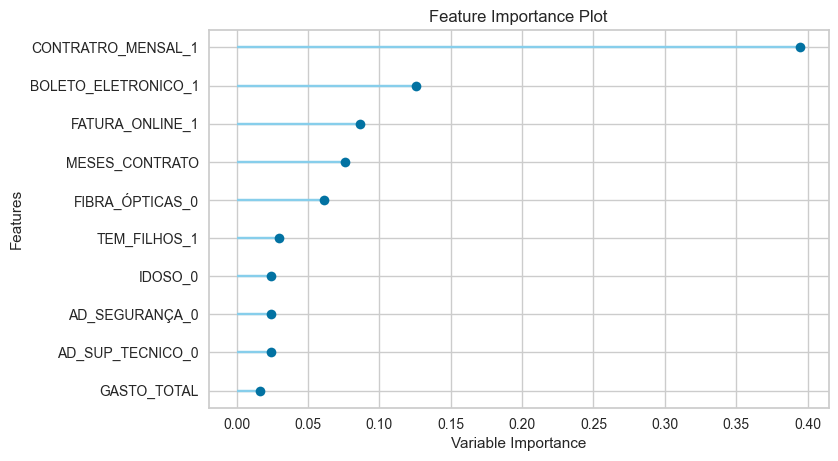

In [12]:
plot_model(gbc, plot = 'feature', use_train_data = True)

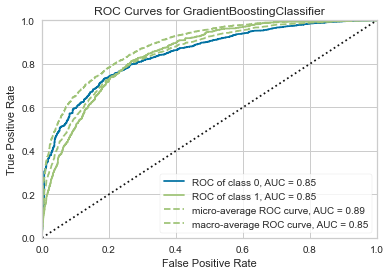

In [13]:
plot_model(gbc)

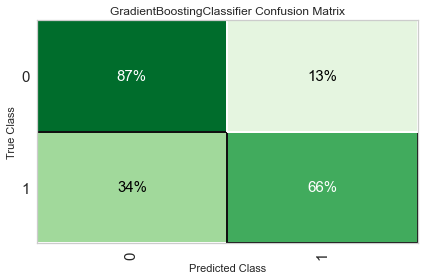

In [14]:
plot_model(gbc, plot='confusion_matrix', use_train_data = True, plot_kwargs={'percent' : True})

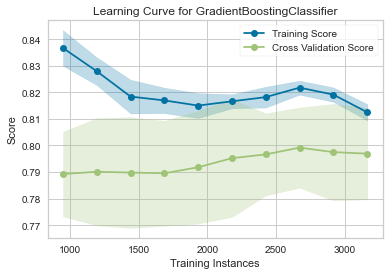

In [15]:
plot_model(gbc, plot='learning', use_train_data = True, plot_kwargs={'percent' : True})

In [16]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7756,0.8229,0.3804,0.6140,0.4698,0.3373,0.3528
1,0.8011,0.8085,0.4457,0.6833,0.5395,0.4197,0.4353
2,0.7756,0.8173,0.3478,0.6275,0.4476,0.3210,0.3430
3,0.8040,0.8505,0.4565,0.6885,0.5490,0.4303,0.4451
4,0.7699,0.7960,0.3587,0.6000,0.4490,0.3150,0.3317
5,0.7869,0.7992,0.3804,0.6604,0.4828,0.3606,0.3823
6,0.7778,0.8146,0.3956,0.6102,0.4800,0.3468,0.3599
7,0.7835,0.8229,0.3516,0.6531,0.4571,0.3368,0.3620
8,0.7863,0.8293,0.3956,0.6429,0.4898,0.3642,0.3814


In [17]:
finalize_model(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4934, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4460,0.7917,0.9565,0.3154,0.4744,0.1339,0.2405
1,0.4091,0.8143,1.0000,0.3067,0.4694,0.1156,0.2477
2,0.4318,0.7890,0.9783,0.3125,0.4737,0.1284,0.2469
3,0.4062,0.8572,1.0000,0.3056,0.4682,0.1131,0.2449
4,0.3778,0.7992,1.0000,0.2958,0.4566,0.0891,0.2160
5,0.3494,0.8212,1.0000,0.2866,0.4455,0.0661,0.1849
6,0.4672,0.8236,0.9560,0.3222,0.4820,0.1538,0.2623
7,0.4387,0.7910,0.9890,0.3147,0.4775,0.1386,0.2653
8,0.4530,0.8048,0.9780,0.3190,0.4811,0.1479,0.2683


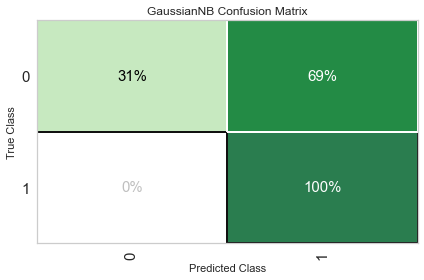

In [19]:
plot_model(nb, plot='confusion_matrix', use_train_data = True, plot_kwargs={'percent' : True})

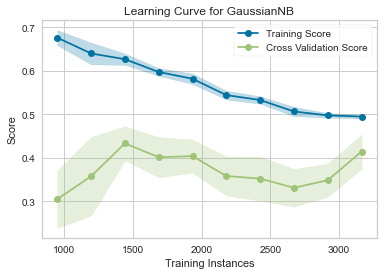

In [20]:
plot_model(nb, plot='learning', use_train_data = True, plot_kwargs={'percent' : True})

In [21]:
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6534,0.7545,0.7826,0.4138,0.5414,0.3030,0.3430
1,0.6420,0.7819,0.8152,0.4076,0.5435,0.2993,0.3483
2,0.6847,0.7656,0.7500,0.4395,0.5542,0.3351,0.3638
3,0.6591,0.7748,0.7935,0.4195,0.5489,0.3145,0.3559
4,0.6733,0.8019,0.8152,0.4335,0.5660,0.3412,0.3852
5,0.6392,0.8043,0.8478,0.4084,0.5512,0.3066,0.3644
6,0.7037,0.8251,0.8571,0.4615,0.6000,0.3966,0.4448
7,0.6581,0.8033,0.8571,0.4216,0.5652,0.3336,0.3911
8,0.6695,0.7834,0.7912,0.4260,0.5538,0.3270,0.3667


In [22]:
finalize_model(tuned_nb)

GaussianNB(priors=None, var_smoothing=7e-07)